## Loading data set

In [3]:
import os

from pathlib import Path
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [4]:
# Define the path to the training data

train_dir_none = Path('/home/santanu/code/VMontejo/lunar-crater-age-classifier/raw_data/train/none')


In [6]:
# Inspect Image Shapes
shapes = []

for img_name in os.listdir(train_dir_none):
    img_path = train_dir_none / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = Image.open(img_path)
        shapes.append((img.height, img.width, len(img.getbands())))

unique_shapes = set(shapes)
print("Unique shapes:", unique_shapes)

Unique shapes: {(227, 227, 3)}


In [11]:
# Check Pixel Value Range
pixels = []

for img_name in os.listdir(train_dir_none):
    img_path = train_dir_none / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = np.array(Image.open(img_path))
        pixels.append(img.mean())

print("Global min pixel:", np.min(pixels))
print("Global max pixel:", np.max(pixels))
print("Global average pixel:", np.mean(pixels))

Global min pixel: 11.907081449280987
Global max pixel: 196.9140095868346
Global average pixel: 86.58908035789649


In [12]:
# compute data set mean and std
all_pixels = []

for img_name in os.listdir(train_dir_none):
    img_path = train_dir_none / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = np.array(Image.open(img_path).convert('L'))
        all_pixels.append(img.flatten())
    all_pixels.append(img.flatten())

all_pixels = np.concatenate(all_pixels)

mean = np.mean(all_pixels)
std = np.std(all_pixels)

print("Dataset Mean:", mean)
print("Dataset Std:", std)

Dataset Mean: 87.09731574816028
Dataset Std: 40.87120154696426


In [10]:
img = (img-mean)/std
img

array([[-2.19535087, -2.19535087, -2.19459128, ..., -2.1581309 ,
        -2.15889049, -2.15889049],
       [-2.19535087, -2.19535087, -2.19459128, ..., -2.15889049,
        -2.15965008, -2.15965008],
       [-2.19611047, -2.19611047, -2.19459128, ..., -2.15889049,
        -2.15965008, -2.16116927],
       ...,
       [-2.2021872 , -2.2021872 , -2.2021872 , ..., -2.16344804,
        -2.15889049, -2.15661172],
       [-2.2021872 , -2.2021872 , -2.2021872 , ..., -2.16496722,
        -2.16040967, -2.1581309 ],
       [-2.2014276 , -2.2014276 , -2.2021872 , ..., -2.167246  ,
        -2.16192886, -2.15889049]], shape=(227, 227))

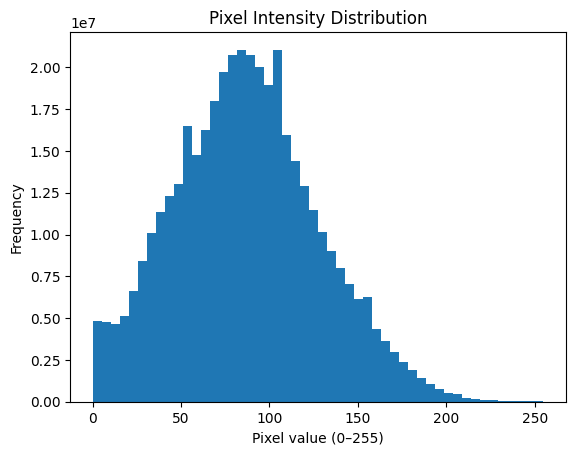

In [13]:
#Plot Pixel Histograms
plt.hist(all_pixels, bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value (0–255)")
plt.ylabel("Frequency")
plt.show()